In [1]:
# imprescindible
import pandas as pd
import numpy as np

# to avoid some warnings messages
import warnings
warnings.filterwarnings('ignore')

# to draw some graphs
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn and matplotlib default theme
sns.set_theme()
_sns_plotting_contex_ = sns.plotting_context()
sns.plotting_context('poster')

# set seaborn and matplotlib style to ...
# plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 14

# to use HTML codes within IPpython.display function
from IPython.display import HTML



In [2]:

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error


### Data

In [3]:
data_raw = pd.read_csv("./data/blogData_train.csv", header=None)
data_raw.drop_duplicates(inplace=True)

In [4]:
data_raw.shape

(49203, 281)

In [5]:
X_train = data_raw.iloc[:,0:280]
y_train = data_raw.iloc[:,-1]

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [7]:
RMSE = lambda v: round(np.sqrt(v), 4)

class Model :
    def __init__(self, name, model) :
        self.name = name
        self.model = model
        return    


In [8]:

models = []
models.append( Model('Linear Regression', 
                     LinearRegression() ) )

models.append( Model('Random Forest Regressor', 
                     RandomForestRegressor(
                         n_estimators=100, 
                         # criterion='squared_error', 
                         max_depth=3, 
                         bootstrap=True, 
                         n_jobs=-1, 
                         max_samples=0.3, 
                         random_state=127) 
                    ) )

models.append( Model('Gradient Boosting Regressor', 
                     GradientBoostingRegressor(
                         # loss='squared_error', 
                         learning_rate=0.1, 
                         n_estimators=100, 
                         subsample=1, 
                         criterion='friedman_mse', 
                         max_depth=3, 
                         random_state=127) 
                    ) )

print('Train target values'.ljust(32), 'std :', round(y_train.std(), 4))
for m in models :
    m.model.fit(X_train, y_train)
    y_pred = m.model.predict(X_train)
    
    print(m.name.ljust(32), 'RMSE:', RMSE(mean_squared_error(y_train, y_pred)))

Train target values              std : 38.4972
Linear Regression                RMSE: 30.6107
Random Forest Regressor          RMSE: 25.3854
Gradient Boosting Regressor      RMSE: 21.5453


---

In [9]:
import os

In [10]:

filepath = './data/test/'
filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]

test_raw = pd.DataFrame()

for filename in filelist :
    temp_raw = pd.read_csv(filename, header=None)
    temp_raw.drop_duplicates(inplace=True)
    test_raw = test_raw.append(temp_raw)

test_raw.shape

(7036, 281)

In [11]:
X_test = test_raw.iloc[:,0:280]
y_test = test_raw.iloc[:,-1]

# using train scaler
X_test = scaler.transform(X_test)

for m in models :
    y_pred = m.model.predict(X_test)

    print(m.name.ljust(32), 'RMSE:', RMSE(mean_squared_error(y_test, y_pred)))

Linear Regression                RMSE: 26.3417
Random Forest Regressor          RMSE: 23.9832
Gradient Boosting Regressor      RMSE: 23.0803


In [60]:
def set_figure(row, col, suptitle=None, y=0.98) :
    u''' Activate matplot figure setting size and super title
    '''
    fig = plt.figure(figsize=(row, col));
    if suptitle != None :
        fig.suptitle(suptitle, 
                     verticalalignment='center', fontsize='xx-large', fontweight='extra bold', y=y);
    return fig

In [28]:
temp1 = pd.DataFrame(y_train.value_counts())
temp1.reset_index(inplace=True)
temp1.columns = ['comments count', 'observations']
temp1 = temp1.astype({'comments count':'int64'})
temp1


,comments count,observations
0,0,31888
1,1,5427
2,2,2627
3,3,1515
4,4,1037
...,...,...
433,430,1
434,349,1
435,334,1
436,328,1


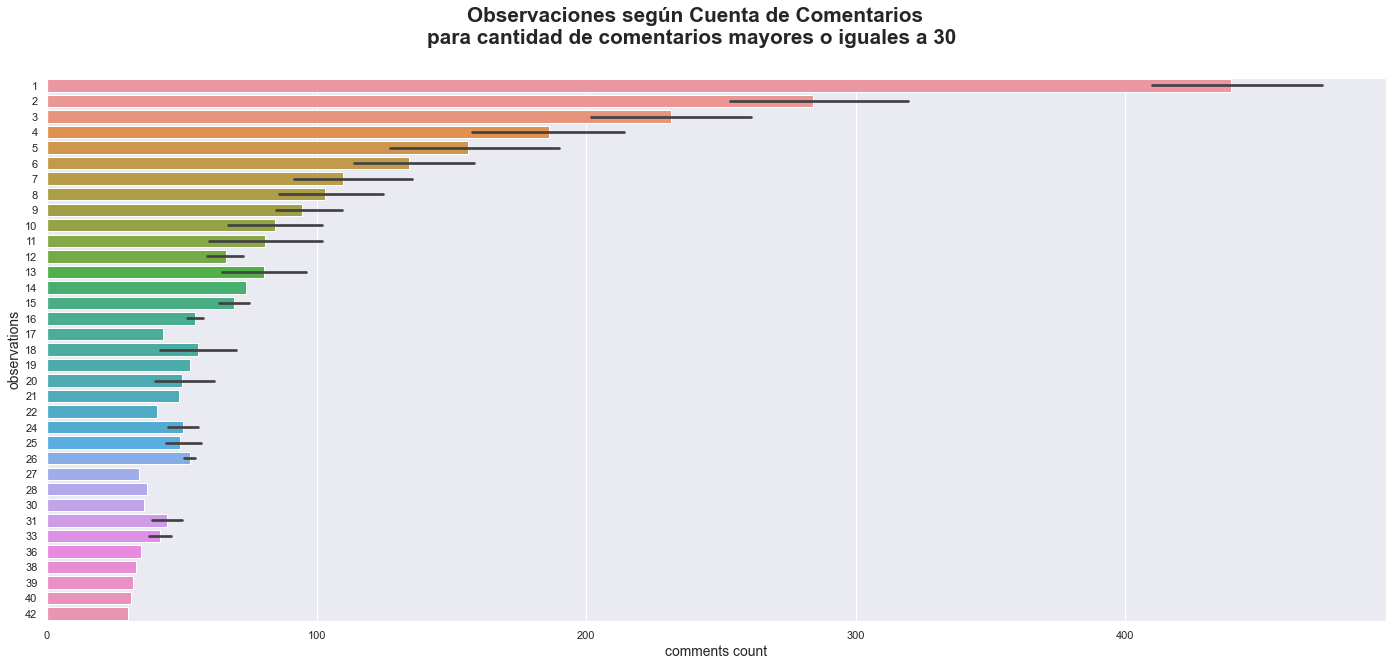

In [65]:
set_figure(24, 10, 'Observaciones según Cantidad de Comentarios\npara cantidad de comentarios mayores o iguales a 30 ', y=0.95)
sns.barplot(data=temp1[temp1['comments count']>=30], x='comments count', y='observations', orient='h');

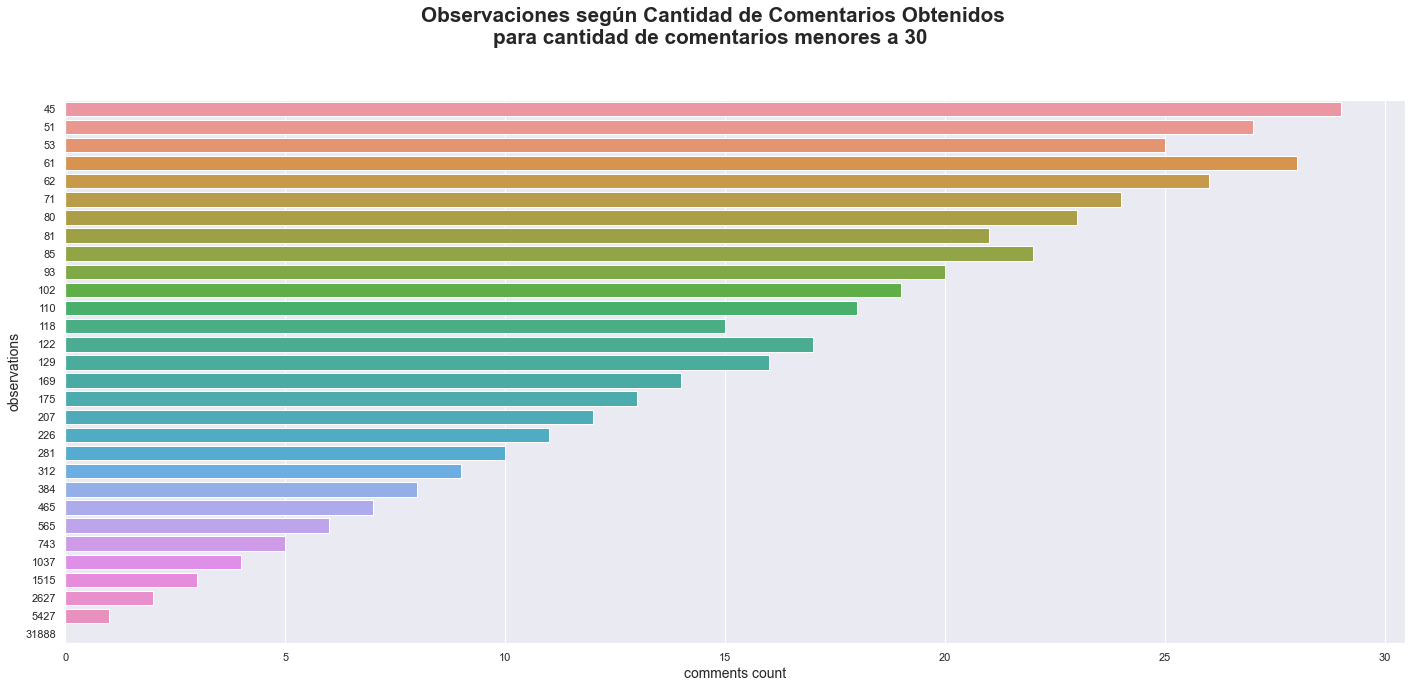

In [64]:
set_figure(24, 10, 'Observaciones según Cantidad de Comentarios Obtenidos\npara cantidad de comentarios menores a 30 ')
sns.barplot(data=temp1[temp1['comments count']<30], x='comments count', y='observations', orient='h');